# Understanding Convolutional Neural Networks (CNNs)

## What is a Convolutional Neural Network?
A **Convolutional Neural Network (CNN)** is a type of deep learning model designed to process images, videos, and other grid-like data. It is commonly used in tasks like image recognition, object detection, and facial recognition.

### Key Components of a CNN

- **Key-Frames**: A **key-frame** is an important frame in a sequence (like in videos) that captures significant visual information. In CNNs, images are treated like key-frames, where important features are extracted for recognition.

- **Filters (Kernels)**: A **filter** (also called a kernel) is a small matrix that moves across an image to detect specific patterns, such as edges, textures, or shapes. Filters help identify important features of an image without considering unnecessary details.
  
  For example, a **3x3 filter** can detect vertical edges by scanning small parts of an image and emphasizing patterns.

- **Feature Extraction**: Feature extraction is the process of identifying key characteristics of an image, such as edges, corners, or textures. When a filter moves across an image, it produces a **feature map** that highlights important structures.
  
  This process helps CNNs recognize objects regardless of their position, size, or lighting conditions.

- **Max-Pooling**: **Max-pooling** is a technique used to reduce the size of the feature map while keeping the most important information. It works by taking the **maximum value** from small regions of the image, making the network more efficient and less sensitive to slight changes in position.
  
  For example, in a **2x2 max-pooling**, the highest value in a 2x2 section is retained, and the rest are discarded. This helps reduce computational cost while preserving essential features.

### How CNNs Work Step by Step
1. **Input Layer** – The image is provided as input.
2. **Convolutional Layers** – Filters scan the image to detect patterns and extract features.
3. **ReLU Activation** – Negative values are removed to introduce non-linearity.
4. **Pooling Layer** – Max-pooling reduces the feature map size while retaining important information.
5. **Fully Connected Layer** – The extracted features are used to make predictions.
6. **Output Layer** – The final prediction is made (e.g., identifying a cat or dog).

### Why Are CNNs Powerful?
- **Automatically learn features** – No need for manual feature selection.
- **Recognize patterns anywhere in an image** – Useful for object detection.
- **Reduce computational cost** – Max-pooling helps simplify data.

CNNs have revolutionized fields like medical imaging, self-driving cars, and facial recognition. By understanding filters, feature extraction, and pooling, you can start exploring deep learning applications!



In [7]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import datasets, layers, models

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


## Load Data 

In [8]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 751s 4us/step


(50000, 32, 32, 3)

[9]


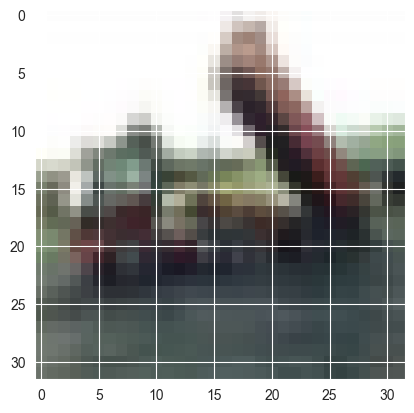

In [10]:
# Show sample image
img_num = 2
plt.imshow(x_train[img_num])
print(y_train[img_num])

# Reshape the Data
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

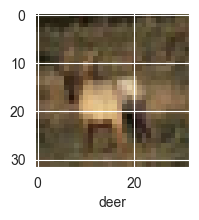

In [11]:
# Define the classes for the y-labels
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_sample(x, y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index]])

plot_sample(x_train, y_train, 3)

# Normalize the images
x_train = x_train / 255.0
x_test = x_test / 255.0


## Make a Simple Neural Network

In [12]:
# Build a simple Neural Network
ann = models.Sequential([
    layers.Flatten(input_shape=(32,32, 3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

ann.fit(x_train, y_train, epochs=5)

D:\PremieraAlpha\College\3rd_Year-Second Semester\CS346 F2 Intelligent Systems 2\Learn Artificial Intelligence\myenv\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 65s 40ms/step - accuracy: 0.3028 - loss: 1.9288
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.4148 - loss: 1.6558
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 45ms/step - accuracy: 0.4500 - loss: 1.5617
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.4695 - loss: 1.4976
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 46ms/step - accuracy: 0.4967 - loss: 1.4388


In [16]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.39      0.49      1000
           1       0.70      0.51      0.59      1000
           2       0.48      0.15      0.23      1000
           3       0.33      0.37      0.35      1000
           4       0.40      0.45      0.42      1000
           5       0.49      0.24      0.32      1000
           6       0.36      0.78      0.49      1000
           7       0.48      0.61      0.54      1000
           8       0.49      0.75      0.59      1000
           9       0.65      0.45      0.53      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.46     10000
weighted avg       0.50      0.47      0.46     10000



## Make a Convolutional Neural Network

In [15]:
# Build a Convolutional Neural Networks
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

cnn.fit(x_train, y_train, epochs=10)

D:\PremieraAlpha\College\3rd_Year-Second Semester\CS346 F2 Intelligent Systems 2\Learn Artificial Intelligence\myenv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3724 - loss: 1.7281
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.5951 - loss: 1.1499
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 14ms/step - accuracy: 0.6518 - loss: 0.9960
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.6902 - loss: 0.8997
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7074 - loss: 0.8423
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.7324 - loss: 0.7812
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.7444 - loss: 0.7383
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7563 - loss: 0.7020
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 16ms/step - accuracy: 0.7713 - loss: 0.6607
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.7817 - loss: 0.6254


In [18]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.74      0.74      1000
           1       0.85      0.80      0.82      1000
           2       0.66      0.52      0.58      1000
           3       0.51      0.51      0.51      1000
           4       0.52      0.73      0.61      1000
           5       0.58      0.66      0.61      1000
           6       0.84      0.68      0.75      1000
           7       0.72      0.79      0.75      1000
           8       0.85      0.76      0.80      1000
           9       0.83      0.75      0.79      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.70     10000
weighted avg       0.71      0.69      0.70     10000

